# [作業目標]
- 使用 Day 12 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns # 另一個繪圖-樣式套件

import warnings
warnings.filterwarnings('ignore')

# 設定 data_path
dir_data = './data/'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [5]:
day_data = app_train[['FLAG_OWN_CAR', 'DAYS_BIRTH']]
day_data.head()

,FLAG_OWN_CAR,DAYS_BIRTH
0,0,9461
1,0,16765
2,1,19046
3,0,19005
4,0,19932


In [6]:
app_train['FLAG_OWN_CAR'].unique()

array([0, 1])

In [7]:
bin_cut = np.linspace(0, 100, num = 11, endpoint=True)
day_data['YEARS_BIRTH_GRP'] = pd.cut(day_data['DAYS_BIRTH'] / 365, bins = bin_cut)
day_data['YEARS_BIRTH'] = day_data['DAYS_BIRTH'] / 365
day_data.head()

,FLAG_OWN_CAR,DAYS_BIRTH,YEARS_BIRTH_GRP,YEARS_BIRTH
0,0,9461,"(20.0, 30.0]",25.920548
1,0,16765,"(40.0, 50.0]",45.931507
2,1,19046,"(50.0, 60.0]",52.180822
3,0,19005,"(50.0, 60.0]",52.068493
4,0,19932,"(50.0, 60.0]",54.608219


In [8]:
age_groups = day_data.groupby(by = 'YEARS_BIRTH_GRP').mean()
age_groups

,FLAG_OWN_CAR,DAYS_BIRTH,YEARS_BIRTH
YEARS_BIRTH_GRP,,,
"(0.0, 10.0]",NaN,NaN,NaN
"(10.0, 20.0]",NaN,NaN,NaN
"(20.0, 30.0]",0.364985,9717.044868,26.622041
"(30.0, 40.0]",0.407506,12819.966844,35.123197
"(40.0, 50.0]",0.376230,16335.968997,44.756079
"(50.0, 60.0]",0.282816,20066.449752,54.976575
"(60.0, 70.0]",0.184603,23124.915709,63.355933
"(70.0, 80.0]",NaN,NaN,NaN
"(80.0, 90.0]",NaN,NaN,NaN


Text(0.5, 1.0, 'Own Car by Age Group')

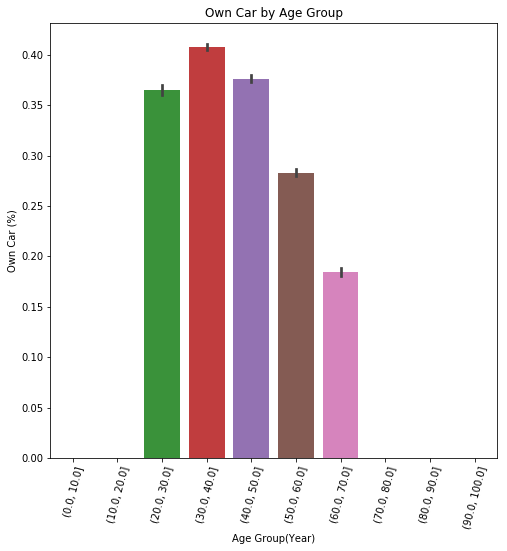

In [9]:
# 參考Day11_HW

plt.figure(figsize = (8, 8))

px = day_data['YEARS_BIRTH_GRP']
# bar長會自動為y在x區間內的平均點! 假設1~11分十個點，則在1~2區間內的值可能會有許多種，因此取平均之後才有辦法畫成bar
py = day_data['FLAG_OWN_CAR']

# Seaborn可以直接處理interval obj
sns.barplot(px, py)

plt.xticks(rotation =75); plt.xlabel('Age Group(Year)'); plt.ylabel('Own Car (%)');
plt.title('Own Car by Age Group')

In [15]:
age_groups

,FLAG_OWN_CAR,DAYS_BIRTH,YEARS_BIRTH
YEARS_BIRTH_GRP,,,
"(0.0, 10.0]",NaN,NaN,NaN
"(10.0, 20.0]",NaN,NaN,NaN
"(20.0, 30.0]",0.364985,9717.044868,26.622041
"(30.0, 40.0]",0.407506,12819.966844,35.123197
"(40.0, 50.0]",0.376230,16335.968997,44.756079
"(50.0, 60.0]",0.282816,20066.449752,54.976575
"(60.0, 70.0]",0.184603,23124.915709,63.355933
"(70.0, 80.0]",NaN,NaN,NaN
"(80.0, 90.0]",NaN,NaN,NaN


Text(0.5, 1.0, 'Own Car by Age Group')

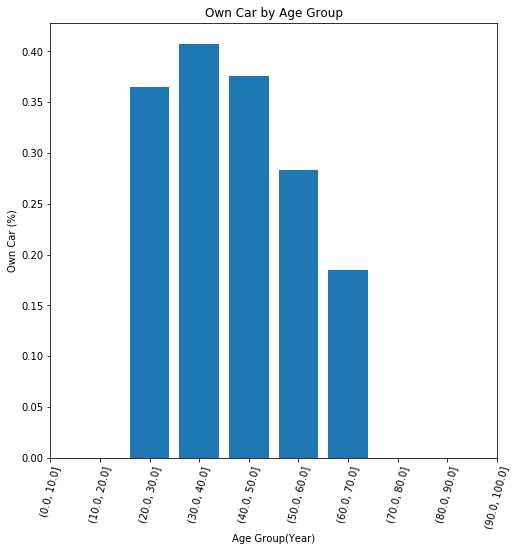

In [17]:
plt.figure(figsize = (8, 8))
# matplotlib無法處理x軸數值為interval obj的狀況(或許可以，但目前未知方法)
plt.bar(range(len(age_groups.index)), age_groups['FLAG_OWN_CAR'])

plt.xticks(range(len(age_groups.index)), age_groups.index, rotation =75); plt.xlabel('Age Group(Year)'); plt.ylabel('Own Car (%)');
plt.title('Own Car by Age Group')

TypeError: float() argument must be a string or a number, not 'pandas._libs.interval.Interval'

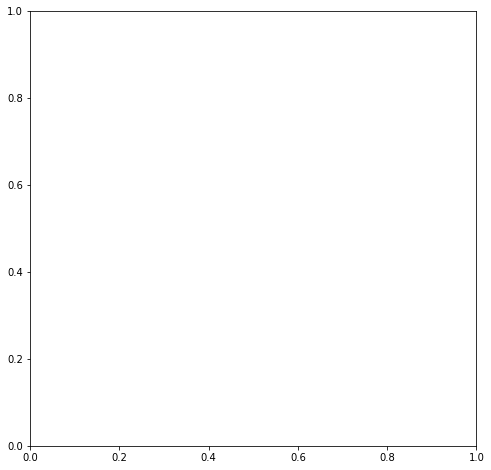

In [23]:
plt.figure(figsize = (8, 8))
# matplotlib無法處理x軸數值為interval obj的狀況(或許可以，但目前未知方法)
plt.bar(age_groups.index, age_groups['FLAG_OWN_CAR'])